In [1]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [2]:
reward_cfg = {
    'n_sample': 100,
    'n_epoch': 10,
    'lr': 0.9,
    'verbose': False,
    'print_freq': 500,
    'batch_size': 64, # not used atm
    'split': 0.8,
    'log': 'cross_ent'
}

In [3]:
# Create reward function
f = lambda x: -(x[0]-1)**2
g = lambda x: -(x[1]-0)**2
sigma_f, sigma_g = 0.0, 0.0
reward_fn = create_reward_fn(f, g, sigma_f, sigma_g)
comparison_fn = create_comparison_fn(f, g, sigma_f, sigma_g)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(-10, 10, size=(2,)) for _ in range(n)])

# Learn reward function from samples and feedback from comparison function
learnt_reward_fn = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg)
    
    

/Users/anandsranjan/Desktop/chai/multitask/learning.py:53: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  tensor_x = torch.Tensor(comparisons_x)


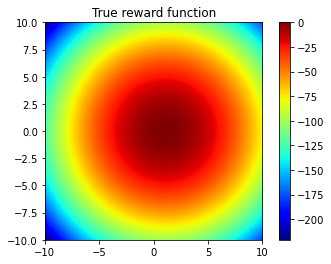

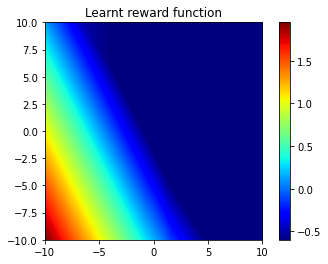

In [ ]:
visualize_fn(reward_fn, "True reward function")
visualize_fn(learnt_reward_fn, "Learnt reward function")